In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import os

In [0]:
#main_dir = os.path.realpath(os.path.dirname(__name__))
#main_dir

In [0]:
#login_data = os.path.join(main_dir, 'logins.json')
#ult_data = os.path.join(main_dir, 'ultimate_data_challenge.json')

In [4]:
df_login = pd.read_json('/content/logins.json')
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df_ult = pd.read_json('/content/ultimate_data_challenge.json')
df_ult.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


# Exploratory Data Analysis

This section will cover EDA of the df_login dataframe. The dataframe will be resampled to every 15 minutes and will be graphically illustrated to show login frequency over the period

In [0]:
import matplotlib.pyplot as plt

In [7]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [8]:
df_login.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [0]:
# Resample data to 15 minute intervals
df_login_resampled = df_login.set_index('login_time').sort_index().resample('15T').size()

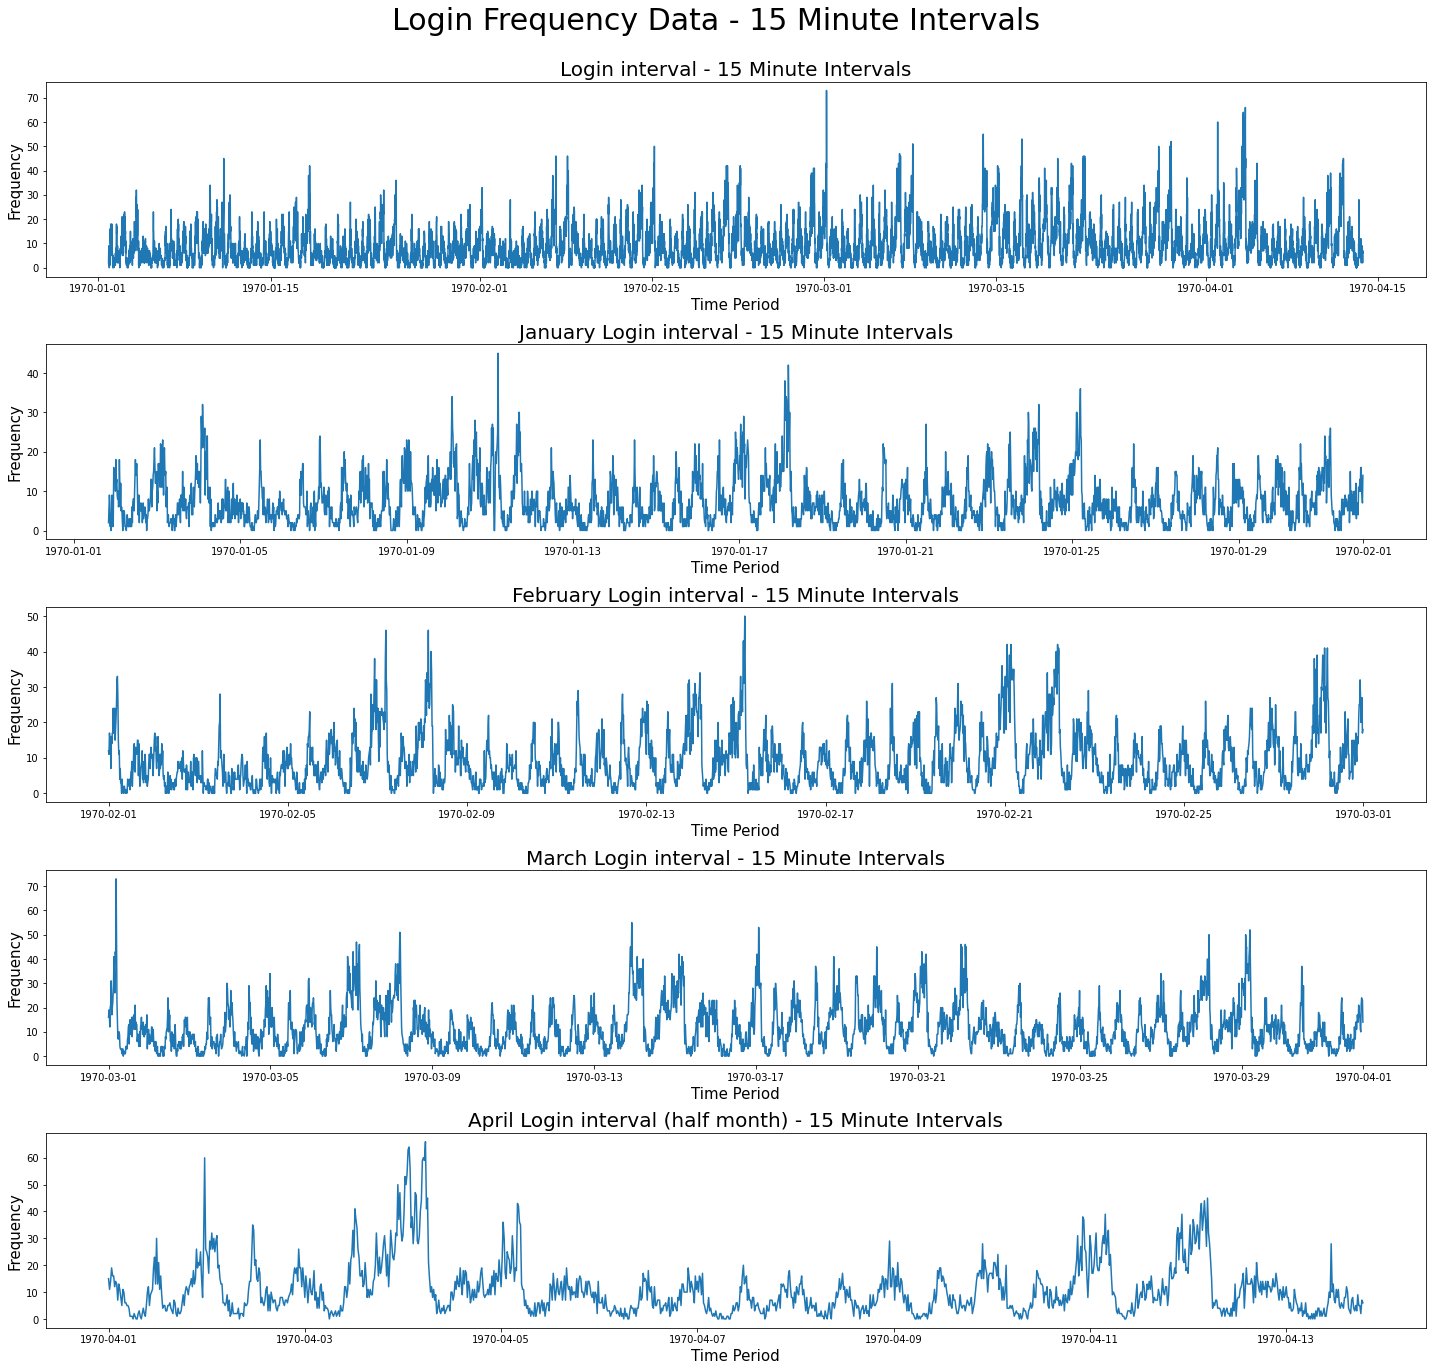

In [10]:
# Resampled Plots
plt.figure(figsize=(20, 20))
plt.suptitle('Login Frequency Data - 15 Minute Intervals', size = 30)

# Plot 1 - Full Data
plt.subplot(5, 1, 1)
plt.plot(df_login_resampled)
plt.title('Login interval - 15 Minute Intervals', size = 20)
plt.xlabel('Time Period', size = 15)
plt.ylabel('Frequency', size = 15)

# Plot II - January
plt.subplot(5, 1, 2)
plt.plot(df_login_resampled.loc['1970-01-01':'1970-01-31'])
plt.title('January Login interval - 15 Minute Intervals', size = 20)
plt.xlabel('Time Period', size = 15)
plt.ylabel('Frequency', size = 15)

# Plot III - February
plt.subplot(5, 1, 3)
plt.plot(df_login_resampled.loc['1970-02-01':'1970-02-28'])
plt.title('February Login interval - 15 Minute Intervals', size = 20)
plt.xlabel('Time Period', size = 15)
plt.ylabel('Frequency', size = 15)

# Plot IV - March
plt.subplot(5, 1, 4)
plt.plot(df_login_resampled.loc['1970-03-01':'1970-03-31'])
plt.title('March Login interval - 15 Minute Intervals', size = 20)
plt.xlabel('Time Period', size = 15)
plt.ylabel('Frequency', size = 15)

# Plot V - April
plt.subplot(5, 1, 5)
plt.plot(df_login_resampled.loc['1970-04-01':'1970-04-30'])
plt.title(f'April Login interval (half month) - 15 Minute Intervals', size = 20)
plt.xlabel('Time Period', size = 15)
plt.ylabel('Frequency', size = 15)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

# Part II - Experiment and Metric Design

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - how you will implement the experiment
    - what statistical test(s) you will conduct to verify the significance of the
      observation
    - how you would interpret the results and provide recommendations to the city
      operations team along with any caveats.

## Answers

1. You could reimburse tolls during peak time for both cities, and see if that helps with demand on weekdays. On weekends, both cities could have tolls reimbursed, as bot cities are reasonably active.

2. 
    a. - You could record data for users that meet a minimum riding theshold over a period of time (this will discourage outliers, and one-off trips). 
    - You could measure the total amount refunded, vs the total amount made, and determine if riders that meet the threshold are actually your targets.
    - You could analyze ride frequency throughout the day, and assess the usage of riders throughout the day to see if they meet the rider usage threshold (i.e., minimum 2+ rides per X)

b. All observations would be compared to the original values, thus each experiment would have to compare the mean to the original, aswell as other experiments. The best way to do this is to conduct an ANOVA to get differences in means, as well as ANCOVA to get differences in variance.

c. Based on the results of the data, and the analysis tests, reimbursements can be done at peak times for qualified riders. If this appears to make a difference, then it can be expanded out to other demographics and times, that have much less usage.

# Part III - Predictive Modeling

This section of the notebook is used to predict user retention, aswell as determine which factors are the best predictors for retention

In [11]:
df_ult.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [12]:
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [13]:
df_ult.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### Data Cleaning

This subsection will cover data cleaning. Here we convert datatypes to correct formats, address null values and reshape the dataframe into targets (X) and labels (y).

In [14]:
# Convert 'signup-date' and 'last_trip_date' to datetime format
df_ult['signup_date'] = pd.to_datetime(df_ult['signup_date'])
df_ult['last_trip_date'] = pd.to_datetime(df_ult['last_trip_date'])
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [15]:
# Fill NaN of avg_rating_of_driver to avg driver rating
avg_driver_rating = df_ult['avg_rating_of_driver'].mean()
df_ult['avg_rating_of_driver'].fillna(avg_driver_rating, inplace=True)
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [16]:
# Fill NaN of phone with 'other'
df_ult['phone'].fillna('other', inplace=True)
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [17]:
# Fill avg_rating_by_driver to avg rating given
avg_rating = df_ult['avg_rating_by_driver'].mean()
df_ult['avg_rating_by_driver'].fillna(avg_rating, inplace=True)
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [18]:
# Convert ultimate_black_user to int64
df_ult['ultimate_black_user'] = df_ult['ultimate_black_user'].astype(int)
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int64         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(2), ob

In [19]:
# Convert city to one-hot
df_ult = pd.get_dummies(data = df_ult, columns = ['city'])
df_ult.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,0,1


In [20]:
# Convert phone to one-hot
df_ult = pd.get_dummies(data = df_ult, columns = ['phone'])
df_ult.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_other
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,1,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0


In [21]:
# Find 'active' users
df_active = df_ult[df_ult['trips_in_first_30_days'] >= 1]
df_active.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_other
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,1,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0
5,2,2014-01-09,3.5,1.00,2014-06-06,0.0,1,100.0,10.56,5.0,0,0,1,0,1,0


In [22]:
# Percentage of data to keep
print(f'The percentage of data that is of active users is: {(len(df_active)/len(df_ult)) * 100}%')

The percentage of data that is of active users is: 69.22%


In [23]:
# Get 'active' users
df_active['active'] = np.where(((df_active['last_trip_date'] - df_active['signup_date']) / np.timedelta64(1, 'M')) > 5, 1, 0)
df_active.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_other,active
0,4,2014-01-25,4.700000,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.300000,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,1,0,0,0,1,0,0
3,9,2014-01-10,4.600000,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,2014-01-27,4.400000,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0,0
5,2,2014-01-09,3.500000,1.00,2014-06-06,0.0,1,100.0,10.56,5.0,0,0,1,0,1,0,0
6,1,2014-01-24,4.601559,1.00,2014-01-25,0.0,0,100.0,3.95,4.0,1,0,0,1,0,0,0
7,2,2014-01-28,5.000000,1.00,2014-01-29,0.0,0,100.0,2.04,5.0,0,0,1,0,1,0,0
8,2,2014-01-21,4.500000,1.00,2014-02-01,0.0,0,100.0,4.36,5.0,0,0,1,1,0,0,0
9,1,2014-01-03,4.601559,1.00,2014-01-05,0.0,0,0.0,2.37,5.0,0,0,1,1,0,0,0
10,1,2014-01-13,5.000000,1.00,2014-05-30,0.0,1,100.0,4.28,4.9,0,0,1,0,1,0,0


In [24]:
print(f'Number of active users over a month: {(len(df_active[df_active["active"] == 1]) / len(df_active)) * 100}%')

Number of active users over a month: 23.46431667148223%


In [0]:
# Partition Data
y = df_active['active']
X = df_active.drop(['signup_date', 'last_trip_date', 'active'], axis = 1)

In [26]:
X.shape, y.shape

((34610, 14), (34610,))

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34610 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  34610 non-null  int64  
 1   avg_rating_of_driver    34610 non-null  float64
 2   avg_surge               34610 non-null  float64
 3   surge_pct               34610 non-null  float64
 4   ultimate_black_user     34610 non-null  int64  
 5   weekday_pct             34610 non-null  float64
 6   avg_dist                34610 non-null  float64
 7   avg_rating_by_driver    34610 non-null  float64
 8   city_Astapor            34610 non-null  uint8  
 9   city_King's Landing     34610 non-null  uint8  
 10  city_Winterfell         34610 non-null  uint8  
 11  phone_Android           34610 non-null  uint8  
 12  phone_iPhone            34610 non-null  uint8  
 13  phone_other             34610 non-null  uint8  
dtypes: float64(6), int64(2), uint8(6)
memo

### Model Training

This section of the notebook will go over training models (logistic regression, XGBoost, NN)

In [0]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

In [0]:
# Format Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 23)

In [30]:
# Logistic Regression
params = {'penalty': ['l1'], 'solver': [ 'liblinear', 'saga'], 'C': np.arange(0.0001, 10, 20)}, {'penalty': ['l2'], 'solver': ['newton-cg', 'sag', 'lbfgs'], 'C': np.arange(0.0001, 10, 20)}, {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': np.arange(0.0001, 10, 20), 'l1_ratio': np.arange(0, 1, 10)}, {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'C': np.arange(0.0001, 10, 20)}

log_reg = LogisticRegression()

clf = GridSearchCV(log_reg, 
                   params, 
                   n_jobs = -1,
                   cv = 5,
                   scoring = 'accuracy')

clf.fit(X_train, y_train)

# Get Best Values
best_para = clf.best_params_
best_acc = clf.best_score_

print(f'Best Parameters:, {best_para}\n')
print(f'Best Accuracy:, {best_acc}\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Best Parameters:, {'C': 0.0001, 'penalty': 'none', 'solver': 'lbfgs'}

Best Accuracy:, 0.7787409666377896



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# XGBoost
params = {'predictor': ['gpu_predictor'],
          'max_depth':[3, 5, 6, 8, 10, 15, 25], 
          'eta':[0.01, 0.05, 0.1, 0.3, 0.5], 
          'gamma': [0, 1, 2, 3, 4],
          'n_estimators': [40, 50, 60, 70, 80]}

xgb_model = XGBClassifier()

clf = GridSearchCV(xgb_model, 
                   params, 
                   n_jobs = -1,
                   cv = 5,
                   scoring='accuracy')

clf.fit(X_train, y_train)

# Get Best Values
best_para = clf.best_params_
best_acc = clf.best_score_

print(f'Best Parameters:, {best_para}\n')
print(f'Best Accuracy:, {best_acc}\n')

Best Parameters:, {'eta': 0.01, 'gamma': 4, 'max_depth': 6, 'n_estimators': 60, 'predictor': 'gpu_predictor'}

Best Accuracy:, 0.8070908722814114



In [37]:
# Retrain model on best parameters
xgb_model_perf = XGBClassifier(n_estimators = best_para['n_estimators'],
                                   eta = best_para['eta'],
                                   gamma = best_para['gamma'], 
                                   max_depth = best_para['max_depth'])
xgb_model_perf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
# Get Most Important Factors
imp_features = pd.DataFrame(xgb_model_perf.feature_importances_).transpose()
imp_features.columns = list(X.columns)
imp_features.index = ['XBM'] 
imp_features.transpose().sort_values(by='XBM',ascending=False)

,XBM
avg_rating_by_driver,0.384598
phone_Android,0.097190
surge_pct,0.091983
city_King's Landing,0.089385
weekday_pct,0.060763
phone_iPhone,0.059337
city_Astapor,0.043989
ultimate_black_user,0.040805
avg_surge,0.038060
avg_rating_of_driver,0.024057


We can see that the most important feature is the 'avg_rating_by_driver' followed by 'phone_Android' and 'surge_pct'. Graphing these three features, will give us some insight into determining active users

In [0]:
# Import seaborn for plotting
import seaborn as sns

In [0]:
active_users = df_active[df_active["active"] == 1]
non_active_users = df_active[df_active["active"] == 0]

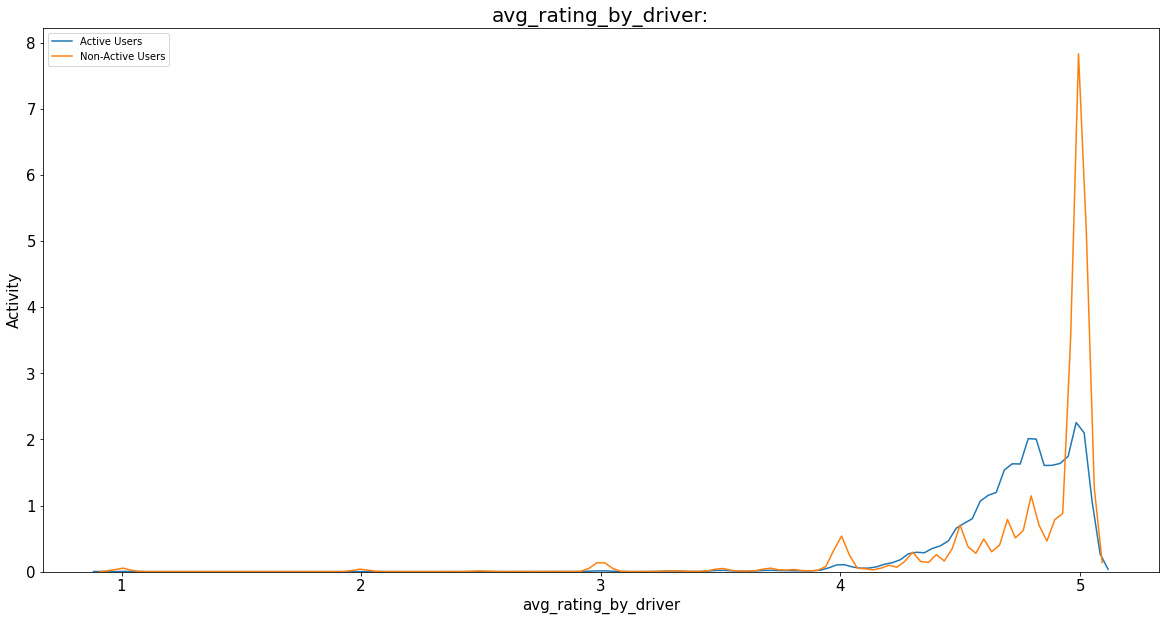

In [49]:
plt.figure(figsize=(20,10))
sns.distplot(active_users['avg_rating_by_driver'], hist=False, kde_kws={"label": "Active Users"});
sns.distplot(non_active_users['avg_rating_by_driver'], hist=False, kde_kws={"label": "Non-Active Users"});
plt.title('avg_rating_by_driver:', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("avg_rating_by_driver", size=15)
plt.ylabel('Activity', size=15)
plt.show()

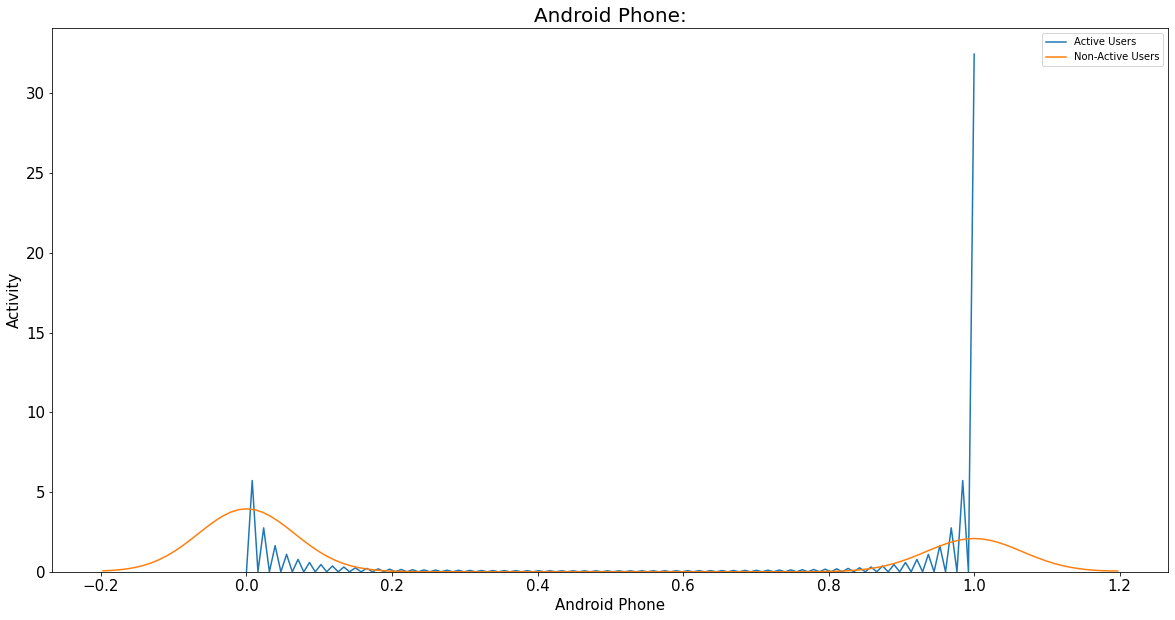

In [50]:
plt.figure(figsize=(20,10))
sns.distplot(active_users['phone_Android'], hist=False, kde_kws={"label": "Active Users"});
sns.distplot(non_active_users['phone_Android'], hist=False, kde_kws={"label": "Non-Active Users"});
plt.title('Android Phone:', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Android Phone", size=15)
plt.ylabel('Activity', size=15)
plt.show()

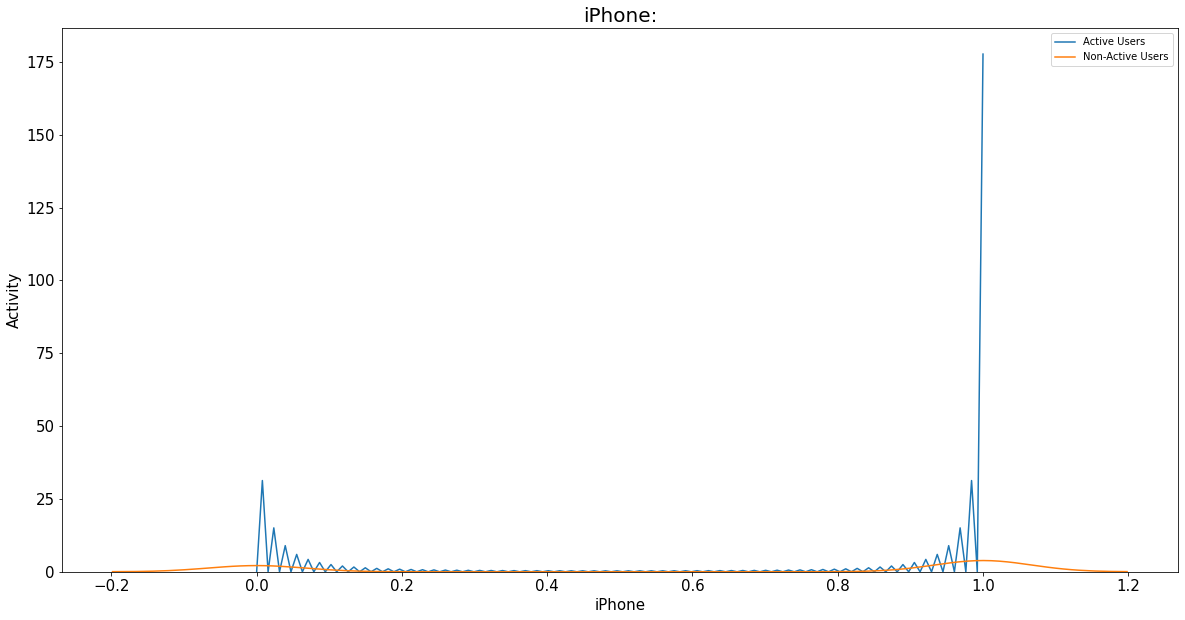

In [51]:
plt.figure(figsize=(20,10))
sns.distplot(active_users['phone_iPhone'], hist=False, kde_kws={"label": "Active Users"});
sns.distplot(non_active_users['phone_iPhone'], hist=False, kde_kws={"label": "Non-Active Users"});
plt.title('iPhone:', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("iPhone", size=15)
plt.ylabel('Activity', size=15)
plt.show()

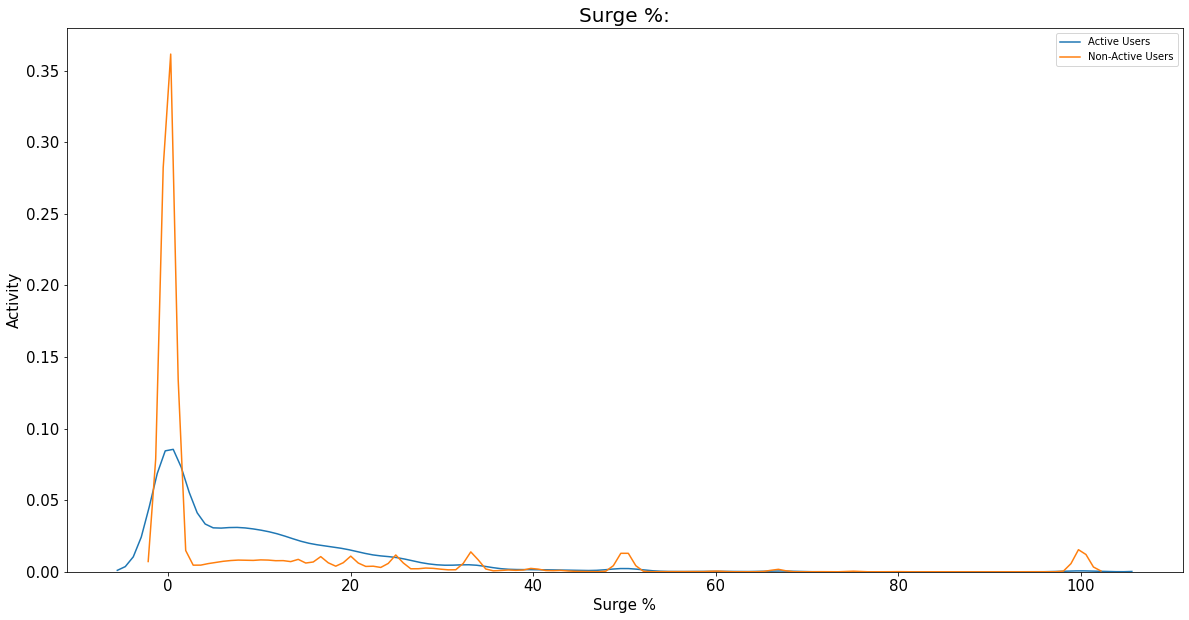

In [48]:
plt.figure(figsize=(20,10))
sns.distplot(active_users['surge_pct'], hist=False, kde_kws={"label": "Active Users"});
sns.distplot(non_active_users['surge_pct'], hist=False, kde_kws={"label": "Non-Active Users"});
plt.title('Surge %:', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Surge %", size=15)
plt.ylabel('Activity', size=15)
plt.show()

We can see that active users are the following:
1. More likely to be higher rated by drivers (4 and above)
2. Are more likely to be Android users, whereas iPhone users are more likely to be non-active users
3. Are less likely to take trip whether or not surge pricing is in effect

Ultimate can use this data to target more Android users, and can identify Active users based on whether or not their rating is above 4, and whether or not they pay for the service when surge pricing is in effect